# Objective of this notebook
The goal of this notebook  is to provide you with a simple and minimal set of examples, so you can start using the `numpy` library and the `matplotlib` library to tackle some Linear Algebra and Matrix Analysis problems.
We strongly suggest you to read the [numpy quick start tutorial](https://docs.scipy.org/doc/numpy-1.15.1/user/quickstart.html)

The following line allows to show plots inside the Jupyter notebook

In [1]:
%matplotlib inline

Import the requiered libraries
+ `numpy` to create and manipulate vectors and matrices, with the name `np`
+ `matplotlib.pyplot` to plot the results with the name `plt`

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Arrays
The main object of NumPy is the `np.array`, an homogeneous multidimensional array. 
An array is simply is table of elements having the same type.
The elements of an array are indexed using positive integers.
It is possible to convert a python list (or a list of lists ...) into a `np.array`, using the `np.array` or the `np.asarray` functions.

In our case __vectors__ and __matrices__ will be represented as `np.array` instances

In [3]:
# encoding a matrix
M = np.asarray([[1,2,3],
                [4,5,6]])
# encoding a vector
v = np.asarray([10.,11.,12.])

In [4]:
M

array([[1, 2, 3],
       [4, 5, 6]])

In [5]:
v

array([10., 11., 12.])

The size of a matrix (or vector) represented as a `np.array` can be seen using through the `ndarray.shape` attribute, and the type of the elements inside the array can be seen using through the `ndarray.dtype` attribute

In this example:
+ $M$ is a $2\times 3$ matrix of integers (`int64`)
+ $v$ is a vector with size $3$ of flats (`float64`)

In [6]:
print(M.shape, v.shape)
print(M.dtype, v.dtype)

(2, 3) (3,)
int64 float64


## Array creation
+ As we have seen previously, you can create a `np.array` using a python list.
+ You can also initialize arrays full of zeros (using `np.zeros`) or ones (using `np.ones`), specifying the size of the array.
+ It is also possible to generate vectors regularly spaced between two boundaries using `np.linspace` (similarly to the `range` function)

In [7]:
M0 = np.zeros( (3,4) )
print(M0)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [8]:
M1 = np.ones( (2,3) )
print(M1)

[[1. 1. 1.]
 [1. 1. 1.]]


In [9]:
start = 0
stop = 10
size_of_vector = 30
v_arange = np.linspace(start, stop, size_of_vector)
print(v_arange)

[ 0.          0.34482759  0.68965517  1.03448276  1.37931034  1.72413793
  2.06896552  2.4137931   2.75862069  3.10344828  3.44827586  3.79310345
  4.13793103  4.48275862  4.82758621  5.17241379  5.51724138  5.86206897
  6.20689655  6.55172414  6.89655172  7.24137931  7.5862069   7.93103448
  8.27586207  8.62068966  8.96551724  9.31034483  9.65517241 10.        ]


It is also possible to use the `np.arange` function providing the start, stop and step instead 

(but using the linspace you have a better control regarding the final size of the array)

In [10]:
start = 0
stop = 10
step = 0.5
v_arange = np.arange(start, stop, step)
print(v_arange)

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]


## Random elements
It is possible to create arrays filled with random values.

Hereafter we only give some examples, but you can check the [numpy.random documentation](https://docs.scipy.org/doc/numpy-1.14.1/reference/routines.random.html) for more functions

+ $M^g$ is a $2\times 3$ matrix, such that $\forall i,j\quad M^g_{i,j} \sim \mathcal{N}(\mu = 0,\sigma = 1)$
+ $M_u$ is a $2\times 3$ matrix, such that $\forall i,j\quad M^u_{i,j} \sim \mathcal{U}(min= 0,max= 1)$

In [11]:
Mg = np.random.randn(2,3)
print(Mg)

[[-0.18254748 -0.21966096 -0.96717866]
 [ 0.03045396 -0.27915735  1.12344191]]


In [12]:
Mu = np.random.random((2,3))
print(Mu)

[[0.12627397 0.13512465 0.72767853]
 [0.51473231 0.01210307 0.62848211]]


## Basic operations
Arithmetic operators are applied __elementwise__ on arrays: the result is output in a new array

+ Multiply each element of $M_u$ by 10

In [13]:
Mu_x10 = Mu * 10
print(Mu_x10)

[[1.26273966 1.3512465  7.27678532]
 [5.14732309 0.12103074 6.28482109]]


+ Add 10 to each element of $M_g$ 

In [14]:
Mg_p10 = Mg + 10
print(Mg_p10)

[[ 9.81745252  9.78033904  9.03282134]
 [10.03045396  9.72084265 11.12344191]]


+ Multiply __elementwise__ $M_u$ and $M_g$
+ This is different from a dot product!!!

In [15]:
Mu_x_Mg = Mu * Mg
print(Mu_x_Mg)

[[-0.02305099 -0.02968161 -0.70379515]
 [ 0.01567564 -0.00337866  0.70606314]]


+ Take the square of each element of $M_u$

In [16]:
Mu_square = Mu**2
print(Mu_square)

[[1.59451144e-02 1.82586710e-02 5.29516046e-01]
 [2.64949350e-01 1.46484402e-04 3.94989762e-01]]


Numpy can also to apply basic operations between a matrix and a vector, row by row, such as in this example:

In [46]:
v = np.asarray([-10,1000,-1000])
print(Mu)
print(Mu * v)

[[0.12627397 0.13512465 0.72767853]
 [0.51473231 0.01210307 0.62848211]]
[[  -1.26273966  135.12464981 -727.67853222]
 [  -5.14732309   12.10307406 -628.48210944]]


## Boolean arrays
It is possible to apply conditions to arrays to get boolean arrays.

Here we check __elementwise__ if the values of $M_u$ are greater than 0.5, and we get a boolean matrix (true if the element is greater than 0.5 and false otherwise)

In [17]:
Mu_g05 = Mu>0.5
print(Mu)
print(Mu_g05)

[[0.12627397 0.13512465 0.72767853]
 [0.51473231 0.01210307 0.62848211]]
[[False False  True]
 [ True False  True]]


Here we check __elementwise__ if the values of $M_g$ are greater than 0, and we get a boolean matrix (true if the element is greater than 0 and false otherwise)

In [18]:
Mg_g0 = Mg>0
print(Mg)
print(Mg_g0)

[[-0.18254748 -0.21966096 -0.96717866]
 [ 0.03045396 -0.27915735  1.12344191]]
[[False False False]
 [ True False  True]]


It is also possible to apply boolean operations, for instance:
+ `np.logical_and` will apply the "and" logical operator to two arrays elementwise
+ `np.logical_or` will apply the "or" logical operator to two arrays elementwise
+ ...

Hereafter we apply the and operator to the results of the two previous steps 

In [19]:
Mu_g05_AND_Mg_g0 = np.logical_and(Mu_g05, Mg_g0)
print(Mu_g05_AND_Mg_g0)

[[False False False]
 [ True False  True]]


## Universal functions
`numpy` provides many universal functions such as :
+ `np.exp` and `np.log` (exponential and logarithm)
+ `np.sin` and `np.cos` (sine and cosine)
+ `np.sqrt` (square root)
+ `np.abs` (absolute value)
+ `np.max` and `np.min` (maximum and minimum)
+ `np.sum` (sum)
+ `np.mean` and `np.std` (mean and standard deviation)
+ ...

This functions can also be applied __elementwise__ to an array

compute the exponential of each element of $M_u$

In [20]:
exp_Mu = np.exp(Mu)
print(exp_Mu)

[[1.13459297 1.14467946 2.07026896]
 [1.67319054 1.01217661 1.87476273]]


Some functions, that aggregate many elements can be applied to each row or each column of a matrix.

Hereafter we sum the elements of the matrix $M_u$ along each row and then along each column

In [41]:
# tell axis = 1 to apply the function to each row
# Mu has two rows
Mu.sum(axis=1)

array([0.98907715, 1.15531749])

In [42]:
# tell axis = 0 to apply the function to each column
# Mu has three  columns
Mu.sum(axis=0)

array([0.64100627, 0.14722772, 1.35616064])

## Indexing the elements of an array


Get the element in row 0 and column 1 from $M_u$

In [21]:
Mu[0,1]

0.1351246498065396

Get all the elements of row 0 of $M_u$

In [22]:
Mu[0,:]

array([0.12627397, 0.13512465, 0.72767853])

Get all the elements of column 2 of $M_u$

In [23]:
Mu[:,2]

array([0.72767853, 0.62848211])

Get all the rows for the first 2 columns of $M_u$

In [24]:
Mu[:,:2]

array([[0.12627397, 0.13512465],
       [0.51473231, 0.01210307]])

In [25]:
# or
Mu[:,[0,1]]

array([[0.12627397, 0.13512465],
       [0.51473231, 0.01210307]])

It is also possible to get elements applying a boolean mask. In this case we will get the elements for which the correspoing element in the boolean mask is true

For instance we will get the elements from $M_u$ s.t. $M_u > 0.5$, using the matrixes previously generated

In [26]:
print(Mu_g05)
print(Mu)
print(Mu[Mu_g05])

[[False False  True]
 [ True False  True]]
[[0.12627397 0.13512465 0.72767853]
 [0.51473231 0.01210307 0.62848211]]
[0.72767853 0.51473231 0.62848211]


## Linear Algebra
It is possible to apply basic linear algebra operations with arrays:
+ Transpositions
+ Identity matrix
+ Dot product

Moreover the `numpy.linalg` package has many linear algebra algorithms ready to use
+ SVD
+ QR
+ Inverse
+ ...

2 ways to compute $M_u^*$ the transpose of $M_u$

In [27]:
print(Mu)
print(Mu.T)
print(Mu.transpose())

[[0.12627397 0.13512465 0.72767853]
 [0.51473231 0.01210307 0.62848211]]
[[0.12627397 0.51473231]
 [0.13512465 0.01210307]
 [0.72767853 0.62848211]]
[[0.12627397 0.51473231]
 [0.13512465 0.01210307]
 [0.72767853 0.62848211]]


Compute $M_u^* \cdot M_g$

$M_u$ is $2\times 3$, so $M_u^*$ is $3 \times 2$, and $M_g$ is $2 \times 3$, so the resulting matrix is $3 \times 3$

In [28]:
Mu_t_Mg = (Mu.T).dot(Mg)
print(Mu_t_Mg) 

[[-0.00737536 -0.17142877  0.45614236]
 [-0.02429808 -0.03306027 -0.11709258]
 [-0.11369611 -0.33528797  0.00226799]]


Compute the inverse of $M_u^* \cdot M_g$

In [29]:
np.linalg.inv(Mu_t_Mg)

array([[-1.66551811e+17, -6.45931243e+17,  1.48846484e+17],
       [ 5.66033805e+16,  2.19522632e+17, -5.05861454e+16],
       [ 1.85798766e+16,  7.20575940e+16, -1.66047387e+16]])

Get a $4\times 4$ identity matrix

In [30]:
I = np.eye(4)
print(I)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


# Plots
It is possible to plot matrices using the `plt.imshow` function

Beware, this function cannot plot a __vector__ !!!

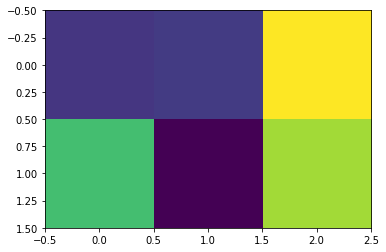

In [31]:
plt.imshow(Mu)

In order to plot vectors you can use the `plt.plot` function

Text(0, 0.5, 'Y')

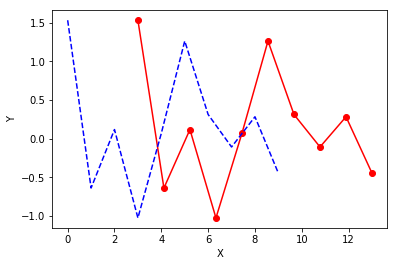

In [32]:
x = np.linspace(3,13,10)
y = np.random.randn(10)
# plot y as a function of x
plt.plot(x,y,"o-",color="red")
# plot y as a function of the index of its elements
plt.plot(y,"--",color="blue")
# Change the label of the x and y axis
plt.xlabel("X", fontsize=10)
plt.ylabel("Y", fontsize=10)

## Much more
It is also possible to stack different arrays, to split an array in small arrays, to reshape arrays ... but we are not going to see these features here